In [10]:
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [11]:
df = pd.read_csv("gapminder-scaled.csv")

X = df.drop(columns=['country', 'lex','cm'])
y = df['lex']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
from sklearn.neural_network import MLPRegressor

In [25]:

model = MLPRegressor(
    hidden_layer_sizes=(256, 128, 64),  
    activation='relu',
    solver='adam',
    alpha=0.001,             
    learning_rate='adaptive',
    learning_rate_init=0.00001,
    max_iter=10000,
    random_state=87,
    early_stopping=True,
    n_iter_no_change=25,
    tol=1e-5,
    verbose=True
)


model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("R² Score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

Iteration 1, loss = 0.63312329
Validation score: -15.269522
Iteration 2, loss = 0.63134885
Validation score: -15.220844
Iteration 3, loss = 0.62957609
Validation score: -15.172094
Iteration 4, loss = 0.62780355
Validation score: -15.123346
Iteration 5, loss = 0.62603252
Validation score: -15.074739
Iteration 6, loss = 0.62426182
Validation score: -15.026136
Iteration 7, loss = 0.62249098
Validation score: -14.977413
Iteration 8, loss = 0.62072069
Validation score: -14.928671
Iteration 9, loss = 0.61895282
Validation score: -14.879988
Iteration 10, loss = 0.61718707
Validation score: -14.831324
Iteration 11, loss = 0.61542351
Validation score: -14.782666
Iteration 12, loss = 0.61366056
Validation score: -14.734066
Iteration 13, loss = 0.61189892
Validation score: -14.685594
Iteration 14, loss = 0.61013764
Validation score: -14.637216
Iteration 15, loss = 0.60837661
Validation score: -14.588917
Iteration 16, loss = 0.60661602
Validation score: -14.540389
Iteration 17, loss = 0.60485592
V

In [13]:
from sklearn.ensemble import RandomForestRegressor

R² Score: 0.8800326530531825
RMSE: 0.06635505734640551


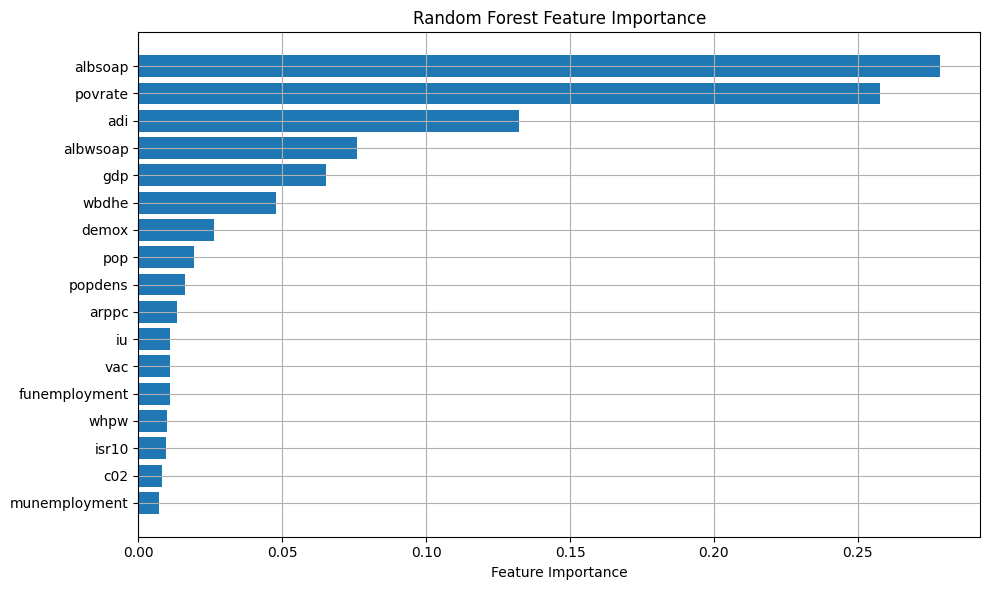

In [14]:
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("R² Score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


importances = model.feature_importances_
features = X.columns


importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)



plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importance")
plt.gca().invert_yaxis()
plt.grid(True)
plt.tight_layout()
plt.show()


In [15]:
import xgboost as xgb
from xgboost import XGBRegressor

R² Score: 0.8499843089645263
RMSE: 0.07420118566815581


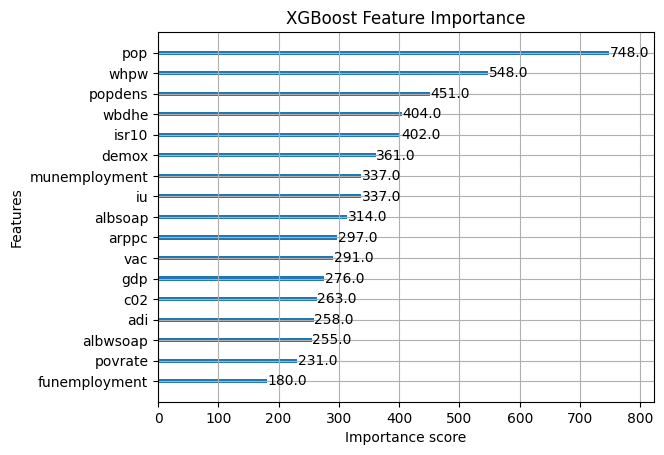

In [16]:
model = XGBRegressor(
    n_estimators=500,
    max_depth=5,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("R² Score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

xgb.plot_importance(model)
plt.title("XGBoost Feature Importance")
plt.show()

In [17]:
from sklearn.neighbors import KNeighborsRegressor

In [18]:
model = KNeighborsRegressor(
    n_neighbors=5,      
    weights='distance', 
    algorithm='auto'    
)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("R² Score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R² Score: 0.8428288808539195
RMSE: 0.07595019169277599
